<a href="https://colab.research.google.com/github/Aatmaj-Zephyr/Machine-Learning-Lab/blob/main/Exp%208/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
original_data = [(3,1,1),(3,-1,1),(6,1,1),(6,-1,1), #positive
        (1,0,-1),(0,1,-1),(0,-1,-1),(-1,0,-1)] #negative


test = [4,1]

In [ ]:
def distance(a,b):
  sum = 0
  for i in range(len(a)):
    sum+= (a[i]-b[i])**2
  return sum

In [ ]:
def extract_data_points(data):
  distances = []
  for i in data:
    for j in data:
      if(i[-1]!=j[-1]):
        distances.append([distance(i,j),i,j])
  sorted_list= sorted(distances, key=lambda x: x[0])
  min_dist = sorted_list[0][0]
  points = []
  for i in sorted_list:
    if(i[0]>min_dist):
      break
    points.append(i[1])
    points.append(i[2])
  points = list(set(points)) # remove duplicates
  return points

data = extract_data_points(original_data)

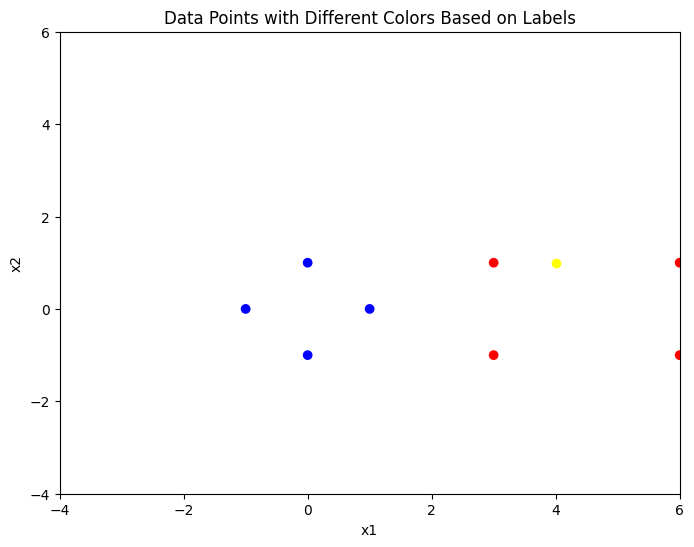

In [ ]:
df = pd.DataFrame(original_data, columns=['x1', 'x2', 'label'])
# Add bias term
df['bias'] = 1
# Separate features and labels
X_orig = df[['x1', 'x2', 'bias']]
y_orig = df['label']
# Plot the data points with different colors based on labels
colors = {1: 'red', -1: 'blue'}
plt.figure(figsize=(8, 6))
plt.scatter(df['x1'], df['x2'], c=df['label'].map(colors))
plt.scatter(test[0],test[1],c='Yellow')
plt.xlabel('x1')
plt.ylabel('x2')


plt.xlim(-4, 6)
plt.ylim(-4, 6)


plt.title('Data Points with Different Colors Based on Labels')
plt.show()

In [ ]:
df = pd.DataFrame(data, columns=['x1', 'x2', 'label'])
# Add bias term
df['bias'] = 1
# Separate features and labels
X = df[['x1', 'x2', 'bias']]
y = df['label']

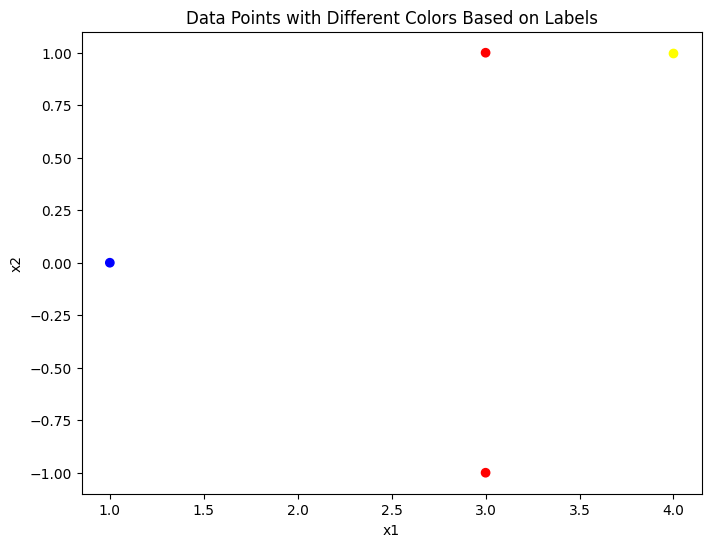

In [ ]:
import matplotlib.pyplot as plt
# Plot the data points with different colors based on labels
colors = {1: 'red', -1: 'blue'}
plt.figure(figsize=(8, 6))
plt.scatter(df['x1'], df['x2'], c=df['label'].map(colors))
plt.scatter(test[0],test[1],c='Yellow')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data Points with Different Colors Based on Labels')
plt.show()

In [ ]:
import numpy as np

np.matrix(X).transpose()



matrix([[ 3,  1,  3],
        [-1,  0,  1],
        [ 1,  1,  1]])

In [ ]:
np.matrix(X)

matrix([[ 3, -1,  1],
        [ 1,  0,  1],
        [ 3,  1,  1]])

In [ ]:
A = np.matrix(X) @ np.matrix(X).transpose()
A

matrix([[11,  4,  9],
        [ 4,  2,  4],
        [ 9,  4, 11]])

In [ ]:
alpha = np.linalg.solve(A, y )
alpha

array([ 0.75, -3.5 ,  0.75])

In [ ]:
W = alpha * np.matrix(X)
W

matrix([[ 1.00000000e+00, -1.11022302e-16, -2.00000000e+00]])

In [ ]:

test=test+ [1]

pred = W @ test
pred


matrix([[2.]])

In [ ]:
if(pred[0][0]>0):
  print("class 1")
else:
  print("class -1")


class 1


In [ ]:
W * np.matrix(X).transpose()

matrix([[ 1., -1.,  1.]])

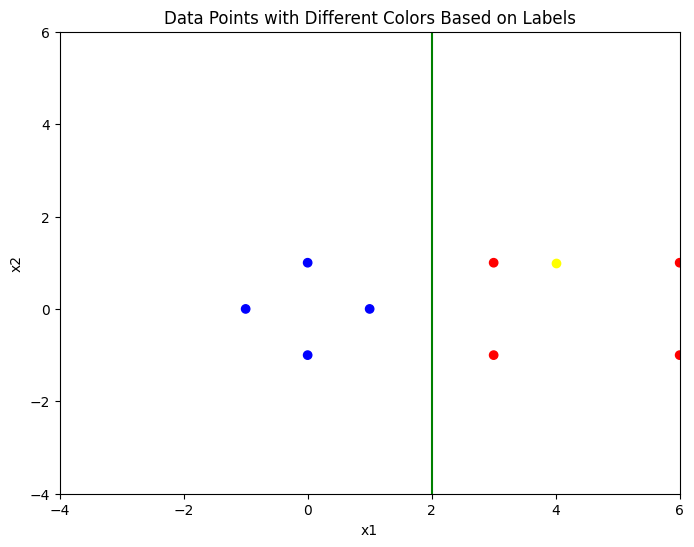

In [ ]:
df = pd.DataFrame(original_data, columns=['x1', 'x2', 'label'])
# Add bias term
df['bias'] = 1
# Separate features and labels
X_orig = df[['x1', 'x2', 'bias']]
y_orig = df['label']
# Plot the data points with different colors based on labels
colors = {1: 'red', -1: 'blue'}
plt.figure(figsize=(8, 6))
plt.scatter(df['x1'], df['x2'], c=df['label'].map(colors))
plt.scatter(test[0],test[1],c='Yellow')
plt.xlabel('x1')
plt.ylabel('x2')



x_values = np.linspace(-4, 4, 100)
y_values = (W[0,0]*x_values+W[0,2])/W[0,1]

plt.plot(x_values, y_values, label='y = wx + b', color='green')
# Set appropriate axis limits
plt.xlim(-4, 6)
plt.ylim(-4, 6)


plt.title('Data Points with Different Colors Based on Labels')
plt.show()